In [48]:
from sportsipy.nfl.teams import Teams
from scipy.stats import pearsonr
from scipy.stats import skew,kurtosis
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import collections

In [2]:
print('Correlation(WinRatio,GoalsForRatio)\n')

maxCorr= -1.1
minCorr= 1.1
minYear = 2021
maxYear = 2021
corrList = []
for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        statd[i] = {'Team' : team.name,
                    'W' : team.wins,
                    'T' : team.games_played-(team.wins+team.losses),
                    'L' : team.losses,
                    'GP' : team.games_played,
                    'WinPct' : round(100*team.wins/team.games_played,3),
                    'LosPct' : round(100*team.losses/team.games_played,3),
                    'GF' : team.points_for,
                    'GA' : team.points_against,
                    'GD' : team.points_for-team.points_against,
                    'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                    'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

    df = pd.DataFrame(statd)
    df = df.transpose()
    
    corr, _ = pearsonr(df['GfrPct'].tolist(), df['WinPct'].tolist())
    corrList.append(corr)
    
    if maxCorr < minCorr:
        minCorr = corr
        maxCorr = corr
        minYear = year
        maxYear = year
        print('%s: %s (new min) (new max)' % (year,round(corr,3)))
    elif corr < minCorr:
        minCorr= corr
        minYear = year
        print('%s: %s (new min)' % (year,round(corr,3)))
    elif corr > maxCorr:
        maxCorr= corr
        maxYear = year
        print('%s: %s (new max)' % (year,round(corr,3)))
    else: 
        print('%s: %s' % (year,round(corr,3)))
        
print('MIN:%s (%s)' % (minYear,round(minCorr,3)))
print('MAX:%s (%s)' % (maxYear,round(maxCorr,3)))
print('AVG:%s' % (round(sum(corrList)/len(corrList),3)))
''' 
1970-2021
MIN:1981 (0.845)
MAX:1984 (0.965)
AVG:0.91
'''

Correlation(WinRatio,GoalsForRatio)

1970: 0.916 (new min) (new max)
1971: 0.883 (new min)
1972: 0.938 (new max)
1973: 0.95 (new max)
1974: 0.922
1975: 0.955 (new max)
1976: 0.911
1977: 0.903
1978: 0.865 (new min)
1979: 0.91
1980: 0.928
1981: 0.845 (new min)
1982: 0.857
1983: 0.882
1984: 0.965 (new max)
1985: 0.916
1986: 0.906
1987: 0.897
1988: 0.923
1989: 0.883
1990: 0.903
1991: 0.911
1992: 0.94
1993: 0.874
1994: 0.893
1995: 0.888
1996: 0.898
1997: 0.928
1998: 0.939
1999: 0.898
2000: 0.92
2001: 0.926
2002: 0.908
2003: 0.909
2004: 0.894
2005: 0.95
2006: 0.904
2007: 0.932
2008: 0.91
2009: 0.913
2010: 0.901
2011: 0.91
2012: 0.92
2013: 0.936
2014: 0.946
2015: 0.932
2016: 0.854
2017: 0.912
2018: 0.921
2019: 0.871
2020: 0.909
MIN:1981 (0.845)
MAX:1984 (0.965)
AVG:0.91


In [41]:
year=1984
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    statd[i] = {'Team' : team.name,
                'W' : team.wins,
                'T' : team.games_played-(team.wins+team.losses),
                'L' : team.losses,
                'G' : team.games_played,
                'WinPct' : round(100*team.wins/team.games_played,3),
                'LosPct' : round(100*team.losses/team.games_played,3),
                'GF' : team.points_for,
                'GA' : team.points_against,
                'GD' : team.points_for-team.points_against,
                'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

df = pd.DataFrame(statd)
df = df.transpose()

'''
x = list(df['LosPct'])
seq = sorted(x,reverse=False)
index = [seq.index(v) for v in x]
df['Iwin'] =  index
'''

l = df[['WinPct','LosPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: (float(x[1]), (-float(x[0])), (-float(x[2]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GD','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igd'] =  index

'''
x = list(df['GD'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igd'] =  index'
'''

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

'''
x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index
'''    

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','T','L','G','GF','GA','GD','WinPct','LosPct','GD_per','GfrPct','Iwin','Igd','Igfp','Delta','Idel']]
df['WINvs50'] = df['WinPct']-50
df_mdian = df.loc[abs(df['GD']) == min(abs((df['GD'])))]
df_mdian = df_mdian[abs(df_mdian['WINvs50']) == min(abs(df_mdian['WINvs50']))]
df_lucky = df[df['Delta'] == max(df['Delta'])].head(1)
df_nluck = df[df['Delta'] == min(df['Delta'])].head(1)
print('%s Luckiest,Median,Unluckiest Teams:' % year)
df_ext = pd.concat([df_lucky,pd.concat([df_mdian,df_nluck],sort=False)],sort=False)
print(df_ext.to_string(index=False))

1984 Luckiest,Median,Unluckiest Teams:
               Team   W  T  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
   Los Angeles Rams  10  0  6  16  346  316  30   62.5   37.5   1.88  52.266     7   10    10      3     0    12.5
 Cincinnati Bengals   8  0  8  16  339  339   0     50     50      0      50    14   12    13     -1    21       0
  Green Bay Packers   8  0  8  16  390  309  81     50     50   5.06  55.794    13    6     7     -6    27       0


In [ ]:
'''
1981 Luckiest,Median,Unluckiest Teams: (most anomolous)
                Team   W  T  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
      Denver Broncos  10  0  6  16  321  289  32   62.5   37.5      2  52.623     8   14    14      6     0    12.5
 Washington Redskins   8  0  8  16  347  349  -2     50     50  -0.12  49.856    14   15    15      1     5       0
     Atlanta Falcons   7  0  9  16  426  355  71  43.75  56.25   4.44  54.545    16    6     8     -8    26   -6.25
    
1984 Luckiest,Median,Unluckiest Teams: (most predictable)
               Team   W  T  L   G   GF   GA  GD WinPct LosPct GD_per  GfrPct  Iwin  Igd  Igfp  Delta  Idel WINvs50
   Los Angeles Rams  10  0  6  16  346  316  30   62.5   37.5   1.88  52.266     7   10    10      3     0    12.5
 Cincinnati Bengals   8  0  8  16  339  339   0     50     50      0      50    14   12    13     -1    21       0
  Green Bay Packers   8  0  8  16  390  309  81     50     50   5.06  55.794    13    6     7     -6    27       0
'''

In [42]:
year=1978
teams = list(Teams(year))
statd = {}
    
for i,team in enumerate(teams[0:len(teams)]):
    statd[i] = {'Team' : team.name,
                'W' : team.wins,
                'T' : team.games_played-(team.wins+team.losses),
                'L' : team.losses,
                'G' : team.games_played,
                'WinPct' : round(100*team.wins/team.games_played,3),
                'LosPct' : round(100*team.losses/team.games_played,3),
                'GF' : team.points_for,
                'GA' : team.points_against,
                'GD' : team.points_for-team.points_against,
                'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3),
                'GD_per' : round((team.points_for-team.points_against)/team.games_played,2)}

df = pd.DataFrame(statd)
df = df.transpose()

'''
x = list(df['LosPct'])
seq = sorted(x,reverse=False)
index = [seq.index(v) for v in x]
df['Iwin'] =  index
'''

l = df[['WinPct','LosPct','GfrPct']].values.tolist()
seq = sorted(l, key=lambda x: (float(x[1]), (-float(x[0])), (-float(x[2]))))
index = [seq.index(v) for v in l]
df['Iwin'] =  index

l = df[['GfrPct','WinPct']].values.tolist()
seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
index = [seq.index(v) for v in l]
df['Igfp'] =  index

'''
x = list(df['GfrPct'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Igfp'] =  index
'''    

df['Delta'] = df['Igfp']-df['Iwin']
x = list(df['Delta'])
seq = sorted(x,reverse=True)
index = [seq.index(v) for v in x]
df['Idel'] =  index

df = df[['Team','W','T','L','G','GF','GA','WinPct','LosPct','GD_per','GfrPct','Iwin','Igfp','Delta','Idel']]
df = df.sort_values(['WinPct','LosPct','GfrPct'],ascending = (False,True,False))
print('%s NFL Season - Ranked by %% Games Won [>LosPct]' % year)
with pd.option_context('display.max_rows',30):
    display(df)

df = df.sort_values('GfrPct',ascending=False)
print('\n%s NFL Season - Ranked by %% Points Scored [<GfrPct]' % year)
with pd.option_context('display.max_rows',30):
    display(df)

df = df.sort_values('Idel',ascending=True)
print('\n%s NFL Season - Ranked by Luck [<Delta (Igfp-Iwin)]' % year)
with pd.option_context('display.max_rows',30):
    display(df)

1978 NFL Season - Ranked by % Games Won [>LosPct]


,Team,W,T,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
4,Pittsburgh Steelers,14,0,2,16,356,195,87.5,12.5,10.06,64.61,0,1,1,7
0,Dallas Cowboys,12,0,4,16,384,208,75,25,11,64.865,1,0,-1,13
8,Los Angeles Rams,12,0,4,16,316,245,75,25,4.44,56.328,2,4,2,4
1,Miami Dolphins,11,0,5,16,372,254,68.75,31.25,7.38,59.425,3,2,-1,13
3,New England Patriots,11,0,5,16,358,286,68.75,31.25,4.5,55.59,4,5,1,7
14,Denver Broncos,10,0,6,16,282,198,62.5,37.5,5.25,58.75,5,3,-2,21
13,Houston Oilers,10,0,6,16,283,298,62.5,37.5,-0.94,48.709,6,14,8,1
5,San Diego Chargers,9,0,7,16,355,309,56.25,43.75,2.88,53.464,7,6,-1,13
9,Oakland Raiders,9,0,7,16,311,283,56.25,43.75,1.75,52.357,8,7,-1,13
17,Philadelphia Eagles,9,0,7,16,270,250,56.25,43.75,1.25,51.923,9,8,-1,13



1978 NFL Season - Ranked by % Points Scored [<GfrPct]


,Team,W,T,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
0,Dallas Cowboys,12,0,4,16,384,208,75,25,11,64.865,1,0,-1,13
4,Pittsburgh Steelers,14,0,2,16,356,195,87.5,12.5,10.06,64.61,0,1,1,7
1,Miami Dolphins,11,0,5,16,372,254,68.75,31.25,7.38,59.425,3,2,-1,13
14,Denver Broncos,10,0,6,16,282,198,62.5,37.5,5.25,58.75,5,3,-2,21
8,Los Angeles Rams,12,0,4,16,316,245,75,25,4.44,56.328,2,4,2,4
3,New England Patriots,11,0,5,16,358,286,68.75,31.25,4.5,55.59,4,5,1,7
5,San Diego Chargers,9,0,7,16,355,309,56.25,43.75,2.88,53.464,7,6,-1,13
9,Oakland Raiders,9,0,7,16,311,283,56.25,43.75,1.75,52.357,8,7,-1,13
17,Philadelphia Eagles,9,0,7,16,270,250,56.25,43.75,1.25,51.923,9,8,-1,13
2,New York Jets,8,0,8,16,359,364,50,50,-0.31,49.654,14,9,-5,24



1978 NFL Season - Ranked by Luck [<Delta (Igfp-Iwin)]


,Team,W,T,L,G,GF,GA,WinPct,LosPct,GD_per,GfrPct,Iwin,Igfp,Delta,Idel
25,Atlanta Falcons,9,0,7,16,240,290,56.25,43.75,-3.12,45.283,11,24,13,0
13,Houston Oilers,10,0,6,16,283,298,62.5,37.5,-0.94,48.709,6,14,8,1
21,Green Bay Packers,8,1,7,16,249,269,50,43.75,-1.25,48.069,13,18,5,2
26,Baltimore Colts,5,0,11,16,239,421,31.25,68.75,-11.38,36.212,24,27,3,3
22,St. Louis Cardinals,6,0,10,16,248,296,37.5,62.5,-3,45.588,21,23,2,4
8,Los Angeles Rams,12,0,4,16,316,245,75,25,4.44,56.328,2,4,2,4
6,Seattle Seahawks,9,0,7,16,345,358,56.25,43.75,-0.81,49.075,10,12,2,4
18,New York Giants,6,0,10,16,264,298,37.5,62.5,-2.12,46.975,20,21,1,7
11,Minnesota Vikings,8,1,7,16,294,306,50,43.75,-0.75,49,12,13,1,7
3,New England Patriots,11,0,5,16,358,286,68.75,31.25,4.5,55.59,4,5,1,7


In [87]:
minDelta = 0
maxDelta = 0
deltaList = []

for year in range(1970, 2021):
    teams = list(Teams(year))
    statd = {}
    for i,team in enumerate(teams[0:len(teams)]):
        statd[i] = {'Team' : team.name,
                    'WinPct' : round(100*team.wins/team.games_played,3),                    
                    'LosPct' : round(100*team.losses/team.games_played,3),
                    'GfrPct' : round(100*team.points_for/(team.points_for+team.points_against),3)}
        
    df = pd.DataFrame(statd)
    df = df.transpose()

    l = df[['WinPct','LosPct','GfrPct']].values.tolist()
    seq = sorted(l, key=lambda x: (float(x[1]), (-float(x[0])), (-float(x[2]))))
    index = [seq.index(v) for v in l]
    df['Iwin'] =  index

    l = df[['GfrPct','WinPct']].values.tolist()
    seq = sorted(l, key=lambda x: ((-float(x[0])), (-float(x[1]))))
    index = [seq.index(v) for v in l]
    df['Igfp'] =  index

    '''
    x = list(df['GfrPct'])
    seq = sorted(x,reverse=True)
    index = [seq.index(v) for v in x]
    df['Igfp'] =  index
    '''
    
    df['Delta'] = df['Igfp']-df['Iwin']
    x = list(df['Delta'])
    
    locMinDelta = int(min(df['Delta']))
    locMinTeam = df.Team[df['Delta'] == locMinDelta]
    locMinTeam = locMinTeam.to_string(index=False)
    locMaxDelta = int(max(df['Delta']))
    locMaxTeam = df.Team[df['Delta'] == locMaxDelta]
    locMaxTeam = locMaxTeam.to_string(index=False)
    
    if maxDelta == minDelta:
        minDelta = locMinDelta
        maxDelta = locMaxDelta
        minTeam = locMinTeam
        maxTeam = locMaxTeam
        minYear = year
        maxYear = year
        print('%s %s: %s (new minDelta) (new maxDelta)' % (year,locMinTeam,round(minDelta,3)))
    if locMinDelta < minDelta:
        minDelta= locMinDelta
        minTeam = locMinTeam
        minYear = year
        print('%s %s: %s (new min)' % (year,locMinTeam,round(minDelta,3)))
    if locMaxDelta > maxDelta:
        maxDelta = locMaxDelta
        maxTeam = locMaxTeam
        maxYear = year
        print('%s %s: %s (new max)' % (year,locMaxTeam,round(maxDelta,3)))
    
    for d in x:
        deltaList.append(d)

deltaList=sorted(deltaList,reverse=False)

1970  St. Louis Cardinals: -6 (new minDelta) (new maxDelta)
1971  Cincinnati Bengals: -13 (new min)
1971  Philadelphia Eagles: 9 (new max)
1978  Atlanta Falcons: 13 (new max)
1983  Kansas City Chiefs: -14 (new min)
2016  Miami Dolphins: 14 (new max)


In [88]:
print('max: ' + str(max(deltaList)))
print('min: ' + str(min(deltaList)))
print('median: ' + str(statistics.median(deltaList)))
print('mean: ' + str(round(statistics.mean(deltaList),2)))
print('mode: ' + str(statistics.mode(deltaList)))
print('pstdev: ' + str(round(statistics.pstdev(deltaList),2)))
print('pvariance: ' + str(round(statistics.pvariance(deltaList),2)))
print('skew: ' + str(round(skew(deltaList,bias=False),2)))
print('kurtosis-3: ' + str(round(kurtosis(deltaList,bias=False)-3,2)))

quartiles=[round(q, 2) for q in statistics.quantiles(deltaList, n=4)]
print('quartiles(excl): '+ str(quartiles))
deciles=[round(q, 2) for q in statistics.quantiles(deltaList, n=10)]
print('deciles(excl): '+ str(deciles))
print('count: ' + str(len(deltaList)))

max: 14
min: -14
median: 0
mean: 0
mode: 0
pstdev: 3.24
pvariance: 10.47
skew: -0.1
kurtosis-3: -0.9
quartiles(excl): [-2.0, 0.0, 2.0]
deciles(excl): [-4.0, -2.0, -1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 4.0]
count: 1509


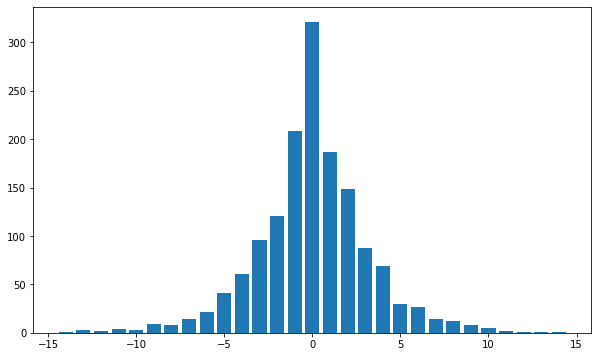

In [89]:
counter=collections.Counter(deltaList)
dely = list(counter.values())
delx = list(counter.keys())
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,dely)
plt.show()

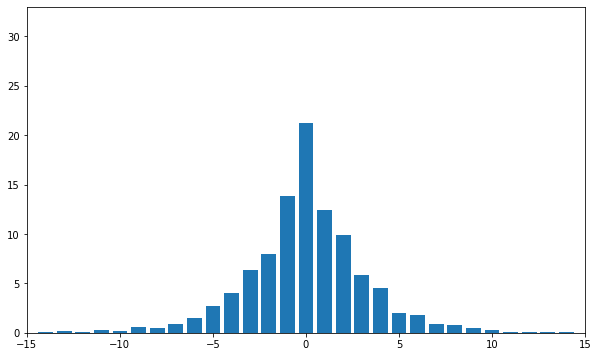

In [99]:
df_freq=pd.DataFrame(list(zip(delx,dely)),columns=['delta','freq'])
df_freq['pct'] = round(100.0*df_freq['freq']/sum(list(df_freq['freq'])),2)
delp = list(df_freq['pct'])
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(delx,delp)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

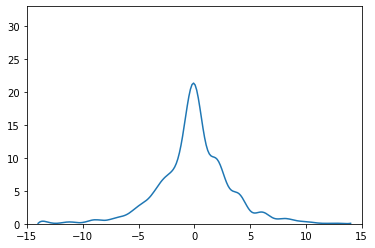

In [114]:
from scipy.interpolate import make_interp_spline, BSpline
import numpy as np

#define x as 200 equally spaced values between the min and max of original x 
xnew = np.linspace(min(delx), max(delx), 200) 

#define spline
spl = make_interp_spline(delx, delp, k=5)
y_smooth = spl(xnew)

#create smooth line chart 
plt.plot(xnew, y_smooth)
plt.xlim([-15, 15])
plt.ylim([0, 33])
plt.show()

In [96]:
pd.DataFrame(list(zip(delx,dely,delp)),columns=['delta','freq','pct'])

,delta,freq,pct
0,-14,1,0.07
1,-13,3,0.20
2,-12,2,0.13
3,-11,4,0.27
4,-10,3,0.20
5,-9,9,0.60
6,-8,8,0.53
7,-7,14,0.93
8,-6,22,1.46
9,-5,41,2.72
